In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import hankel

In [2]:
# Parameters
N = 1000  # Number of samples
omega1 = 3 # True frequency of the sinewave
omega2 = 2 * np.pi # True frequency of the sinewave
omega3 = 8
noise = 0.1 # Noise 
M = int(0.5 * N)  # Delay
dt = 0.1

In [3]:
# Generate the source signal (sinewave)
t = np.arange(N) * dt
signal = np.sin(omega1 * t) + np.sin(omega2 * t) + np.sin(omega3 * t)

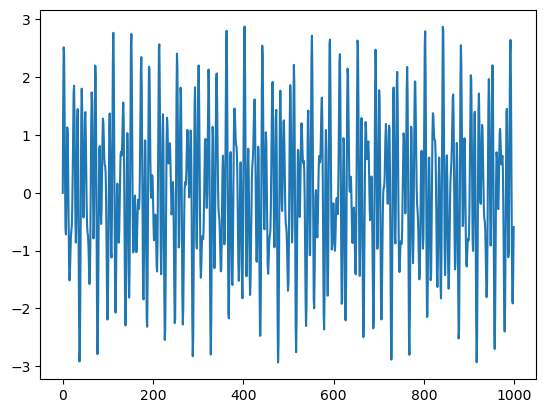

In [4]:
plt.plot(signal)

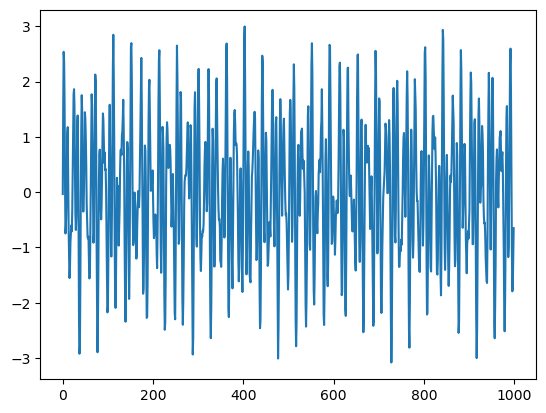

In [5]:
# Add Gaussian noise
noisy_signal = signal + noise * np.random.randn(N)
plt.plot(noisy_signal)

In [6]:
# def make_hankel(data, m, n):
#     return hankel(data[:m], data[m-1:m+n-1])

In [7]:
# k = len(noisy_signal)
# X = make_hankel(noisy_signal, int(np.floor(k / 3) + 1), int(np.ceil(2 / 3 * k)))

In [8]:
# Time-delay embedding
noisy_signals = np.array([np.roll(noisy_signal, i) for i in range(M)])

In [9]:
# Compute the covariance matrix R
R = np.dot(noisy_signals, noisy_signals.conj().T) / N

In [10]:
R.shape

(500, 500)

In [11]:
# Perform eigenvalue decomposition
eigenvalues, eigenvectors = np.linalg.eig(R)
idx = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

In [12]:
# Select the noise subspace (last M-1 eigenvectors)
E_n = eigenvectors[:, 2:]

In [13]:
E_n.shape

(500, 498)

In [14]:
# Define the MUSIC pseudospectrum for frequency estimation
def music_pseudospectrum_freq(E_n, f_grid, t, N):
    P = np.zeros(len(f_grid), dtype=float)
    for i, f in enumerate(f_grid):
        a = np.exp(-1j * f * t)
        P[i] = 1 / np.abs(np.conj(a) @ E_n @ E_n.conj().T @ a)
    return P

In [15]:
# Define the frequency grid to search for the true frequency
f_grid = np.linspace(0, 10, 100)
P = music_pseudospectrum_freq(E_n, f_grid, t[:M], N)

In [16]:
t[:M]

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9,
       11. , 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. ,
       12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. , 13.1,
       13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1, 14.2,
       14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15

In [17]:
f_grid

array([ 0.        ,  0.1010101 ,  0.2020202 ,  0.3030303 ,  0.4040404 ,
        0.50505051,  0.60606061,  0.70707071,  0.80808081,  0.90909091,
        1.01010101,  1.11111111,  1.21212121,  1.31313131,  1.41414141,
        1.51515152,  1.61616162,  1.71717172,  1.81818182,  1.91919192,
        2.02020202,  2.12121212,  2.22222222,  2.32323232,  2.42424242,
        2.52525253,  2.62626263,  2.72727273,  2.82828283,  2.92929293,
        3.03030303,  3.13131313,  3.23232323,  3.33333333,  3.43434343,
        3.53535354,  3.63636364,  3.73737374,  3.83838384,  3.93939394,
        4.04040404,  4.14141414,  4.24242424,  4.34343434,  4.44444444,
        4.54545455,  4.64646465,  4.74747475,  4.84848485,  4.94949495,
        5.05050505,  5.15151515,  5.25252525,  5.35353535,  5.45454545,
        5.55555556,  5.65656566,  5.75757576,  5.85858586,  5.95959596,
        6.06060606,  6.16161616,  6.26262626,  6.36363636,  6.46464646,
        6.56565657,  6.66666667,  6.76767677,  6.86868687,  6.96

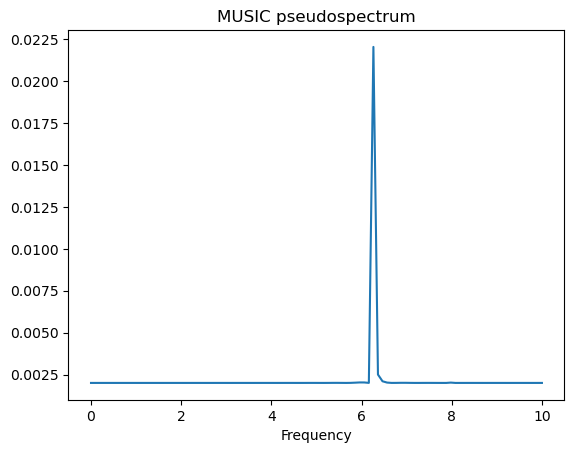

In [18]:
plt.figure()
plt.plot(f_grid, P)
plt.xlabel('Frequency')
plt.title('MUSIC pseudospectrum')
plt.show()

In [19]:
f_grid[np.argmax(P[:len(P)//2])]

4.94949494949495

In [20]:
P

array([0.002     , 0.00200006, 0.00200015, 0.00200016, 0.00200007,
       0.002     , 0.00200005, 0.00200015, 0.00200017, 0.00200008,
       0.002     , 0.00200004, 0.00200015, 0.00200019, 0.0020001 ,
       0.00200001, 0.00200004, 0.00200016, 0.00200022, 0.00200012,
       0.00200001, 0.00200004, 0.00200018, 0.00200026, 0.00200017,
       0.00200002, 0.00200003, 0.00200021, 0.00200037, 0.00200037,
       0.00200002, 0.00200003, 0.00200022, 0.00200037, 0.00200028,
       0.00200006, 0.00200003, 0.00200029, 0.00200054, 0.00200045,
       0.00200012, 0.00200002, 0.0020004 , 0.00200084, 0.00200077,
       0.00200025, 0.00200002, 0.0020006 , 0.00200147, 0.00200154,
       0.00200061, 0.00200001, 0.00200113, 0.00200337, 0.00200417,
       0.00200212, 0.002     , 0.00200356, 0.00201542, 0.00202882,
       0.00202754, 0.00200203, 0.02204588, 0.00250009, 0.00209846,
       0.00202045, 0.00200072, 0.00200233, 0.00200693, 0.00200682,
       0.0020032 , 0.00200036, 0.00200029, 0.00200168, 0.00200